# Space Titanic
> Predict if passengers of an intergalatic transporter transported its passengers or not. 

## Current Task
- Create more parameters from cabin and passengerId 
- Increase the accuracy (research solutions)
    - Is the data properly cleaned? 
    - Am I using the correct type of model? 
    - What hyperparameters should I be using

Outline

Retrieve the data a turn it all into numbers

view

one hot encode all of the categorical values (so the model doesn't correlate numbers closer together as the same)

scale all of the values

look at correlations

Test throwing out some values and keeping others (whatever produces the best results)

#### Understanding the data

![SpaceTitanicImage](<./SpaceTitanicData.png>)

#### Libraries

In [42]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder

### Retrieve and View Data

In [43]:
# Read in the train and test data
train = pd.read_csv('./spaceship-titanic/train.csv')
test = pd.read_csv('./spaceship-titanic/test.csv')
sampleSubmission = pd.read_csv('./spaceship-titanic/sample_submission.csv')
print(train.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


#### FIll in missing

In [44]:
# TODO: This should be done in a more proper way
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

#### Notes on Data
> Predicting if the passenger was simiply transported or not (boolean).
> This is because that is the only values in the train which isn't in the test

### Process Data

#### Break Down passenger ID

In [45]:
passengers = train["PassengerId"]

group = []
person = []

for passenger in passengers:
    if isinstance(passenger, str):
        group.append(passenger[0:4])
        person.append(passenger[6:7])
    else:
        group.append(-1)
        person.append(-1)

train['group'] = group
train['person'] = person

In [46]:
uniquePerson = train['person'].unique()
print(uniquePerson)

['1' '2' '3' '4' '5' '6' '7' '8']


In [47]:
uniqueGroup = train['group'].unique()
print(len(uniqueGroup))

6217


In [48]:
per = train[["person"]]  # Extract the "person" column

# Initialize OneHotEncoder
per_encoder = OneHotEncoder()

# Fit and transform the "person" column
per_cat_1hot = per_encoder.fit_transform(per)

# Convert to a DataFrame with proper column names
per_encoded_df = pd.DataFrame(
    per_cat_1hot.toarray(),  # Convert sparse matrix to a dense array
    columns=per_encoder.get_feature_names_out(["person"])  # Get feature names
)

# Concatenate the new DataFrame with the original DataFrame
train = pd.concat([train, per_encoded_df], axis=1)

# Display the result
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,group,person,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0001,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0002,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0003,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0003,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0004,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,9276,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,9278,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,9279,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,9280,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
passengers = test["PassengerId"]

group = []
person = []

for passenger in passengers:
    if isinstance(passenger, str):
        group.append(int(passenger[0:4]))
        person.append(int(passenger[6:7]))
    else:
        group.append(-1)
        person.append(-1)

test['group'] = group
test['person'] = person

In [50]:
cabinTrain = train['Cabin']

deck = []
num = []
side = []


for cabin in cabinTrain:
    if isinstance(cabin, str):  # Ensure cabin is not NaN and is a valid string
        deck.append(cabin[0])   # Index 0 for deck
        num.append(cabin[2])    # Index 2 for num
        side.append(cabin[4])   # Index 4 for side
    else:
        # Handle cases where the value is NaN or invalid
        deck.append(None)
        num.append(None)
        side.append(None)

train["Deck"] = deck
train["Num"] = num
train["Side"] = side

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,person_2,person_3,person_4,person_5,person_6,person_7,person_8,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,1,S


In [51]:
train['Side'], _ = pd.factorize(train['Side'])

In [52]:
cabinTest = test['Cabin']

deck = []
num = []
side = []


for cabin in cabinTest:
    if isinstance(cabin, str):  # Ensure cabin is not NaN and is a valid string
        deck.append(cabin[0])   # Index 0 for deck
        num.append(cabin[2])    # Index 2 for num
        side.append(cabin[4])   # Index 4 for side
    else:
        # Handle cases where the value is NaN or invalid
        deck.append(None)
        num.append(None)
        side.append(None)

test["Deck"] = deck
test["Num"] = num
test["Side"] = side

#### Remove Name

In [53]:
train = train.drop(columns=["Name"])
train = train.drop(columns="PassengerId")
test = test.drop(columns=["Name"])

train = train.drop(columns="Cabin")
test = test.drop(columns="Cabin")


#### Destination to Number

In [54]:
uniqueDestinations = train['Destination'].unique()
print(uniqueDestinations)
# Looks like there are some missing values that I need to account for

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 0]


In [55]:
train['Destination'], _ = pd.factorize(train['Destination'])

In [56]:
test['Destination'], _ = pd.factorize(test['Destination'])

In [57]:
# Confirm there should be 4 different values
uniqueDestinationsNumbers = train['Destination'].unique()
print(uniqueDestinationsNumbers)

[0 1 2 3]


In [58]:
# Deck Side
train['Deck'], _ = pd.factorize(train['Deck'])
train['Deck'], _ = pd.factorize(train['Deck'])

test['Side'], _ = pd.factorize(test['Side'])
test['Side'], _ = pd.factorize(test['Side'])

#### VIP to Number

In [59]:
train['VIP'], _ = pd.factorize(train['VIP'])
test['VIP'], _ = pd.factorize(test['VIP'])

#### CryoSleep to Number

In [60]:
train['CryoSleep'], _ = pd.factorize(train['CryoSleep'])
test['CryoSleep'], _ = pd.factorize(test['CryoSleep'])

#### HomePlanet to Number

In [61]:
train['HomePlanet'], _ = pd.factorize(train['HomePlanet'])
test['HomePlanet'], _ = pd.factorize(test['HomePlanet'])

In [62]:
train = train.applymap(lambda x: x.replace('/', '0') if isinstance(x, str) else x)
test = test.applymap(lambda x: x.replace('/', '0') if isinstance(x, str) else x)

# Convert all cells to numeric; non-numeric values become NaN
train = train.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
# Convert all cells to numeric; non-numeric values become NaN
train.head()

/var/folders/3v/q192mwhs5095dds9n1kjhyb80000gn/T/ipykernel_4294/4112136542.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(lambda x: x.replace('/', '0') if isinstance(x, str) else x)
/var/folders/3v/q192mwhs5095dds9n1kjhyb80000gn/T/ipykernel_4294/4112136542.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test = test.applymap(lambda x: x.replace('/', '0') if isinstance(x, str) else x)
/var/folders/3v/q192mwhs5095dds9n1kjhyb80000gn/T/ipykernel_4294/4112136542.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(lambda x: pd.to_numeric(x, errors='coerce'))


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,person_2,person_3,person_4,person_5,person_6,person_7,person_8,Deck,Num,Side
0,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1
2,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,1
3,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,1
4,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1


#### Split Train Data Set

In [63]:
corr_matrix = train.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.460132
Destination     0.099737
person          0.066390
person_3        0.060768
person_2        0.048582
Num             0.046738
FoodCourt       0.045583
person_4        0.029559
group           0.021491
person_5        0.010575
ShoppingMall    0.009391
person_6        0.008031
person_7       -0.000529
Deck           -0.002091
person_8       -0.003257
Side           -0.028990
VIP            -0.037261
Age            -0.071330
person_1       -0.087695
HomePlanet     -0.091774
VRDeck         -0.204874
Spa            -0.218545
RoomService    -0.241124
Name: Transported, dtype: float64

array([[<Axes: xlabel='HomePlanet', ylabel='HomePlanet'>,
        <Axes: xlabel='CryoSleep', ylabel='HomePlanet'>,
        <Axes: xlabel='Destination', ylabel='HomePlanet'>,
        <Axes: xlabel='Age', ylabel='HomePlanet'>,
        <Axes: xlabel='VIP', ylabel='HomePlanet'>,
        <Axes: xlabel='RoomService', ylabel='HomePlanet'>,
        <Axes: xlabel='FoodCourt', ylabel='HomePlanet'>,
        <Axes: xlabel='ShoppingMall', ylabel='HomePlanet'>,
        <Axes: xlabel='Spa', ylabel='HomePlanet'>,
        <Axes: xlabel='VRDeck', ylabel='HomePlanet'>,
        <Axes: xlabel='group', ylabel='HomePlanet'>,
        <Axes: xlabel='person', ylabel='HomePlanet'>,
        <Axes: xlabel='Side', ylabel='HomePlanet'>],
       [<Axes: xlabel='HomePlanet', ylabel='CryoSleep'>,
        <Axes: xlabel='CryoSleep', ylabel='CryoSleep'>,
        <Axes: xlabel='Destination', ylabel='CryoSleep'>,
        <Axes: xlabel='Age', ylabel='CryoSleep'>,
        <Axes: xlabel='VIP', ylabel='CryoSleep'>,
        <Axe

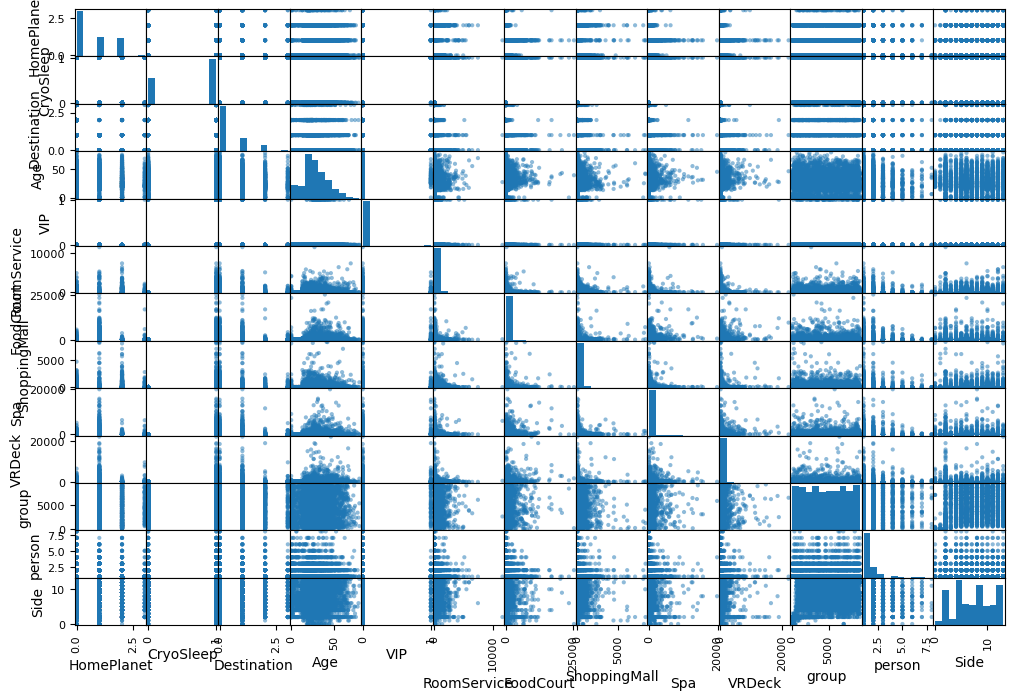

In [64]:
attributes = test.columns.tolist()
scatter_matrix(test[attributes], figsize=(12, 8))
# plt.show()

In [65]:
# Shuffle the data and reset the index
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

Y = train['Transported']

X = train.drop(columns='Transported')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Train

In [66]:
# model = RandomForestClassifier(max_depth=1000, n_estimators=25000, min_samples_split=200, min_samples_leaf=200, random_state=42)
model = RandomForestClassifier(random_state=42) # This works better than the one above, even though it has worse accuracy

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))




Accuracy: 0.79
              precision    recall  f1-score   support

       False       0.78      0.82      0.80       887
        True       0.80      0.76      0.78       852

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



### Run Model on test

In [67]:
test_ID = test["PassengerId"]
test = test.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

test = test.drop(columns="PassengerId")

predictions = model.predict(test)

/var/folders/3v/q192mwhs5095dds9n1kjhyb80000gn/T/ipykernel_4294/350066896.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test = test.applymap(lambda x: pd.to_numeric(x, errors='coerce'))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- person_1
- person_2
- person_3
- person_4
- person_5
- ...


### Format Answer / Create CSV

In [30]:
Answer = pd.DataFrame({
    "PassengerId": test_ID,
    "Transported": predictions
})

print(Answer.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01         True
2     0019_01        False
3     0021_01        False
4     0023_01         True


In [31]:
Answer.to_csv("SpaceTitanic_Answer_v2.csv", index=False)